In [1]:
import pickle
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
with open("../02-data/03-VSM/01-Word2Vec/word2vec-50.pkl", "rb") as f:
    document_vectors = pickle.load(f)
 
doc_paths = list(document_vectors.keys())  # File paths as labels
doc_vectors = np.array(list(document_vectors.values()))  # Convert dict to array

In [11]:
available_colors = list(plt.get_cmap("tab10").colors)  # 'tab10' provides 10 distinct colors

categories = [
    "batteries-non-rechargable-primary",
    "coaxial-cables-rf",
    "microphones",
    "cable-ties-and-zip-ties",
    "printers-label-makers"
]

# Assign each category a unique color dynamically
color_map = {category: available_colors[i % len(available_colors)] for i, category in enumerate(categories)}
color_map["default"] = "black"  # Fallback color

def get_category_color(path):
    """Determine color based on file path."""
    for category, color in color_map.items():
        if category in path:
            return color
    return color_map["default"]

In [ ]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(doc_vectors)

clustered_docs = dict(zip(doc_paths, cluster_labels))

for file_path in doc_paths:
    label_color = get_category_color(file_path)


In [19]:
sil_score = silhouette_score(doc_vectors, cluster_labels)
print(f"Silhouette Score: {sil_score}")

# Initialize an empty list to store true labels
true_labels = []

# Loop through each document path
for path in doc_paths:
    # Check if any of the categories are in the document path
    for category in categories:
        if category in path:
            true_labels.append(category)
            break  # Stop once the correct category is found

# Ensure that the true_labels list has the same length as the cluster_labels list
assert len(true_labels) == len(cluster_labels), "Mismatch between true labels and cluster labels length."

# Now you can compute the ARI score
ari_score = adjusted_rand_score(true_labels, cluster_labels)
# Evaluate with Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(true_labels, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari_score}")


Silhouette Score: 0.30462711697666833
Adjusted Rand Index (ARI): 0.374529125943385


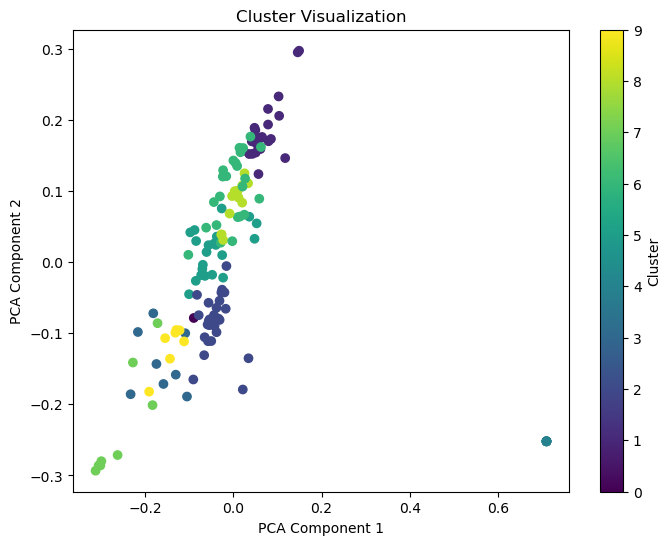

In [20]:
# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(doc_vectors)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Cluster Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

---------------------

In [20]:
import pandas as pd

data = pd.read_csv("../02-data/04-Classifier/preeliminary_classification_exp.csv")
display(data)

,VSM,Classifier,Best Parameters,Accuracy,Evaluation_data
0,word2vec-5-50.pkl,Logistic Regression,"{'C': 10, 'max_iter': 500}",0.954545,"{'train_class_distribution': {0: 42, 1: 32, 2:..."
1,word2vec-5-50.pkl,SVM,"{'C': 10, 'kernel': 'rbf'}",0.954545,"{'train_class_distribution': {0: 42, 1: 32, 2:..."
2,word2vec-5-50.pkl,Random Forest,"{'max_depth': None, 'n_estimators': 200}",0.954545,"{'train_class_distribution': {0: 42, 1: 32, 2:..."
3,glove-5-50.pkl,Logistic Regression,"{'C': 10, 'max_iter': 500}",0.926829,"{'train_class_distribution': {0: 41, 1: 21, 2:..."
4,glove-5-50.pkl,SVM,"{'C': 10, 'kernel': 'linear'}",0.951220,"{'train_class_distribution': {0: 41, 1: 21, 2:..."
5,glove-5-50.pkl,Random Forest,"{'max_depth': 20, 'n_estimators': 100}",0.829268,"{'train_class_distribution': {0: 41, 1: 21, 2:..."
6,fasttext-5-50.pkl,Logistic Regression,"{'C': 10, 'max_iter': 500}",0.804878,"{'train_class_distribution': {0: 41, 1: 21, 2:..."
7,fasttext-5-50.pkl,SVM,"{'C': 10, 'kernel': 'rbf'}",0.878049,"{'train_class_distribution': {0: 41, 1: 21, 2:..."
8,fasttext-5-50.pkl,Random Forest,"{'max_depth': 10, 'n_estimators': 200}",0.926829,"{'train_class_distribution': {0: 41, 1: 21, 2:..."


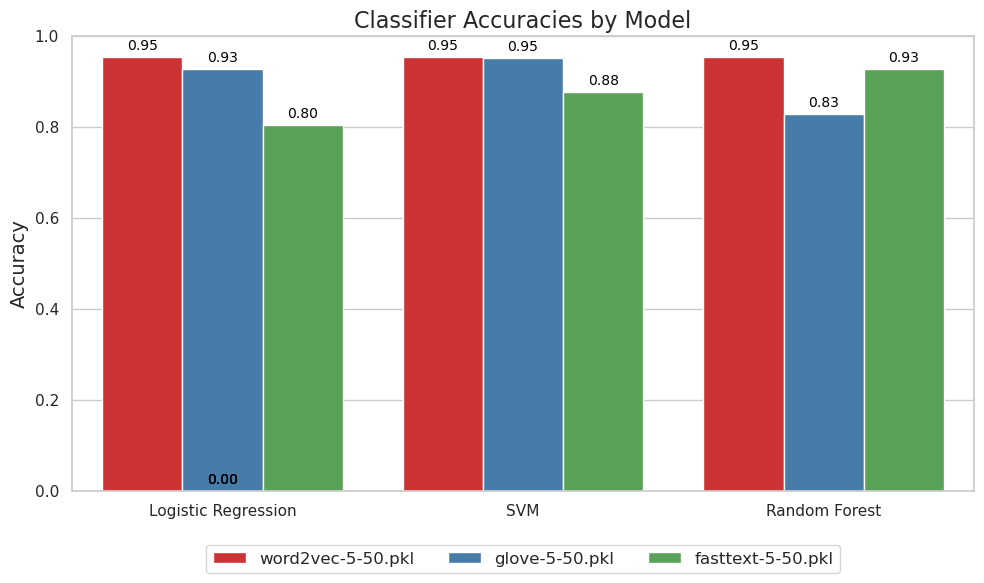

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_model_accuracies(df):
    """
    Plot a grouped bar chart of accuracies for each classifier.
    
    Parameters:
    - df: Pandas DataFrame containing at least three columns:
      'File': which identifies the model (three different files/models should be present)
      'name': the classifier name
      'accuracy': the test set accuracy for the model/classifier
    
    The plot shows:
      - X-axis: The classifier names.
      - Y-axis: The accuracy values.
      - Bars: Colored by the 'File' values.
      - Legend: Displaying which color corresponds to which model.
    """
    sns.set_theme(style="whitegrid")
    sns.set_palette("pastel")
    plt.figure(figsize=(10, 6))

    # Create a bar plot where:
    #   - X is the classifier (name),
    #   - Y is the accuracy,
    #   - Hue indicates which model (VSM) produced that result.
    ax = sns.barplot(data=df, x='Classifier', y='Accuracy', hue='VSM', palette='Set1')
    
    plt.title("Classifier Accuracies by Model", fontsize=16)
    plt.xlabel("")
    plt.ylabel("Accuracy", fontsize=14)
    plt.ylim(0, 1)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3),
                    textcoords='offset points')

    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), fontsize=12, title_fontsize=12, ncol=3)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    

if __name__ == '__main__':
    df_example = pd.DataFrame(data)
    plot_model_accuracies(df_example)

In [30]:
def plot_mean_cosine_similarity(df):
    """
    Plot the mean cosine similarity for each combination of model and classifier.
    
    Assumptions:
      - The DataFrame has the following columns:
          * "File": Identifies the model (e.g., the model file or category).
          * "name": The classifier name.
          * "evaluation_data": A dictionary (or string representation of one) containing, 
            among other things, a key "mean_cosine_similarity_train" for the mean cosine similarity.
          
      - If the evaluation_data column is not already converted to a dictionary, the function
        will attempt to convert it using ast.literal_eval.
    """
    eval_data = df.iloc[0]['Evaluation_data']
    cosine_similarity = eval_data.get('mean_cosine_similarity', None)

    
    # Set the visual style and initialize the figure
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 7))
    
    # Create a grouped bar plot:
    # - x-axis: "File" (the model identifier)
    # - y-axis: "mean_cosine_similarity"
    # - hue: "name" to differentiate classifier types
    ax = sns.barplot(data=cosine_similarity, x='VSM', y='cosine_similarity', hue='name', palette='Set2')
    
    # Set plot title and labels
    plt.title("Mean Cosine Similarity for Each Model and Classifier", fontsize=16)
    plt.xlabel("", fontsize=14)
    plt.ylabel("Mean Cosine Similarity", fontsize=14)
    
    # Optionally, annotate each bar with its mean cosine similarity value formatted to 4 decimals.
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.4f}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black', 
                    xytext=(0, 3), textcoords='offset points')
    
    # Place the legend at the bottom of the plot
    plt.legend(title="Classifier", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=12, title_fontsize=12)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    df_example = pd.DataFrame(data)
    plot_mean_cosine_similarity(df_example)

AttributeError: 'str' object has no attribute 'get'

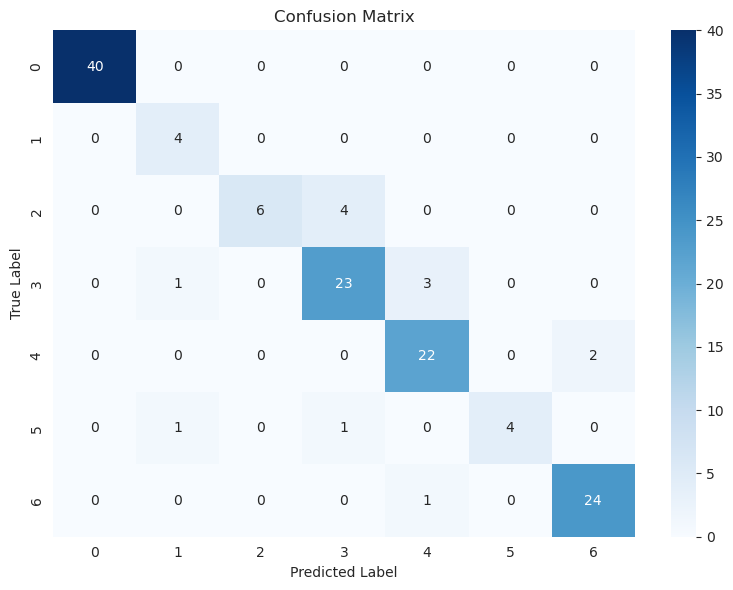

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix as a NumPy array
conf_matrix = np.array([
    [40,  0,  0,  0,  0,  0,  0],
    [ 0,  4,  0,  0,  0,  0,  0],
    [ 0,  0,  6,  4,  0,  0,  0],
    [ 0,  1,  0, 23,  3,  0,  0],
    [ 0,  0,  0,  0, 22,  0,  2],
    [ 0,  1,  0,  1,  0,  4,  0],
    [ 0,  0,  0,  0,  1,  0, 24]
])


# Set up the plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Add plot labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()

# Display the image
plt.show()

In [3]:
import ast
import pandas as pd

def load_results(file_path):
    """
    Load the CSV file and perform type conversion for the columns
    that contain dictionary or list data stored as strings.
    """
    df = pd.read_csv(file_path)

    # If your CSV columns that store dictionaries (or lists) were written as strings,
    # you can convert them back using ast.literal_eval. Adjust the column names as needed.
    dict_columns = ['grid_search_best_params', 'train_class_distribution',
                    'test_class_distribution', 'confusion_matrix']

    for col in dict_columns:
        if col in df.columns:
            # Sometimes the conversion might fail for rows not having eval-parsable strings.
            # Use a function to safely convert these.
            df[col] = df[col].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)

    return df


file_path = '../02-data/04-Classifier/classifiers-4-150.csv'
df = load_results(file_path)

In [12]:
df

,VSM,Classifier,Best Parameters,Accuracy,Evaluation_data
0,word2vec-4-150.pkl,Logistic Regression,"{'C': 10, 'max_iter': 500}",0.940171,"{'train_class_distribution': {0: 118, 1: 116, ..."
1,word2vec-4-150.pkl,SVM,"{'C': 10, 'kernel': 'rbf'}",0.948718,"{'train_class_distribution': {0: 118, 1: 116, ..."
2,word2vec-4-150.pkl,Random Forest,"{'max_depth': None, 'n_estimators': 200}",0.948718,"{'train_class_distribution': {0: 118, 1: 116, ..."
3,glove-4-150.pkl,Logistic Regression,"{'C': 10, 'max_iter': 500}",0.955752,"{'train_class_distribution': {0: 113, 1: 120, ..."
4,glove-4-150.pkl,SVM,"{'C': 10, 'kernel': 'linear'}",0.946903,"{'train_class_distribution': {0: 113, 1: 120, ..."
5,glove-4-150.pkl,Random Forest,"{'max_depth': 10, 'n_estimators': 200}",0.946903,"{'train_class_distribution': {0: 113, 1: 120, ..."
6,fasttext-4-150.pkl,Logistic Regression,"{'C': 10, 'max_iter': 500}",0.929204,"{'train_class_distribution': {0: 113, 1: 120, ..."
7,fasttext-4-150.pkl,SVM,"{'C': 10, 'kernel': 'rbf'}",0.955752,"{'train_class_distribution': {0: 113, 1: 120, ..."
8,fasttext-4-150.pkl,Random Forest,"{'max_depth': None, 'n_estimators': 200}",0.982301,"{'train_class_distribution': {0: 113, 1: 120, ..."


In [ ]:
df = pd.read_csv("data.csv")

In [25]:
df = pd.read_csv("../02-data/04-Classifier/classifiers-4-150.csv")
display(df)

,file_name,classifier,best_params,accuracy,train_class_distribution,test_class_distribution,mean_cosine_similarity_train,cross_val_accuracy,cross_val_std,confusion_matrix,classification_report
0,word2vec-4-150.pkl,Logistic Regression,"{'C': 10, 'max_iter': 500}",0.940171,"{0: 118, 1: 116, 2: 108, 3: 123}","{0: 33, 1: 29, 2: 28, 3: 27}",0.829140,0.948387,0.024894,[[32 1 0 0]\n [ 0 27 2 0]\n [ 0 1 26 1]...,precision ...
1,word2vec-4-150.pkl,SVM,"{'C': 10, 'kernel': 'rbf'}",0.948718,"{0: 118, 1: 116, 2: 108, 3: 123}","{0: 33, 1: 29, 2: 28, 3: 27}",0.829140,0.965591,0.015803,[[33 0 0 0]\n [ 0 27 2 0]\n [ 0 1 26 1]...,precision ...
2,word2vec-4-150.pkl,Random Forest,"{'max_depth': None, 'n_estimators': 50}",0.948718,"{0: 118, 1: 116, 2: 108, 3: 123}","{0: 33, 1: 29, 2: 28, 3: 27}",0.829140,0.935484,0.027202,[[33 0 0 0]\n [ 1 27 1 0]\n [ 1 0 26 1]...,precision ...
3,glove-4-150.pkl,Logistic Regression,"{'C': 10, 'max_iter': 500}",0.955752,"{0: 113, 1: 120, 2: 95, 3: 124}","{0: 36, 1: 25, 2: 26, 3: 26}",0.970645,0.949084,0.008977,[[36 0 0 0]\n [ 1 22 1 1]\n [ 0 1 25 0]...,precision ...
4,glove-4-150.pkl,SVM,"{'C': 10, 'kernel': 'linear'}",0.946903,"{0: 113, 1: 120, 2: 95, 3: 124}","{0: 36, 1: 25, 2: 26, 3: 26}",0.970645,0.953553,0.008214,[[36 0 0 0]\n [ 1 22 1 1]\n [ 0 1 24 1]...,precision ...
5,glove-4-150.pkl,Random Forest,"{'max_depth': 20, 'n_estimators': 100}",0.946903,"{0: 113, 1: 120, 2: 95, 3: 124}","{0: 36, 1: 25, 2: 26, 3: 26}",0.970645,0.929060,0.038928,[[36 0 0 0]\n [ 2 21 2 0]\n [ 0 0 26 0]...,precision ...
6,fasttext-4-150.pkl,Logistic Regression,"{'C': 10, 'max_iter': 500}",0.929204,"{0: 113, 1: 120, 2: 95, 3: 124}","{0: 36, 1: 25, 2: 26, 3: 26}",0.912995,0.918046,0.019659,[[36 0 0 0]\n [ 1 22 0 2]\n [ 2 2 21 1]...,precision ...
7,fasttext-4-150.pkl,SVM,"{'C': 10, 'kernel': 'rbf'}",0.955752,"{0: 113, 1: 120, 2: 95, 3: 124}","{0: 36, 1: 25, 2: 26, 3: 26}",0.912995,0.946911,0.008189,[[36 0 0 0]\n [ 1 22 2 0]\n [ 0 1 25 0]...,precision ...
8,fasttext-4-150.pkl,Random Forest,"{'max_depth': 10, 'n_estimators': 100}",0.982301,"{0: 113, 1: 120, 2: 95, 3: 124}","{0: 36, 1: 25, 2: 26, 3: 26}",0.912995,0.962418,0.014951,[[36 0 0 0]\n [ 1 23 0 1]\n [ 0 0 26 0]...,precision ...


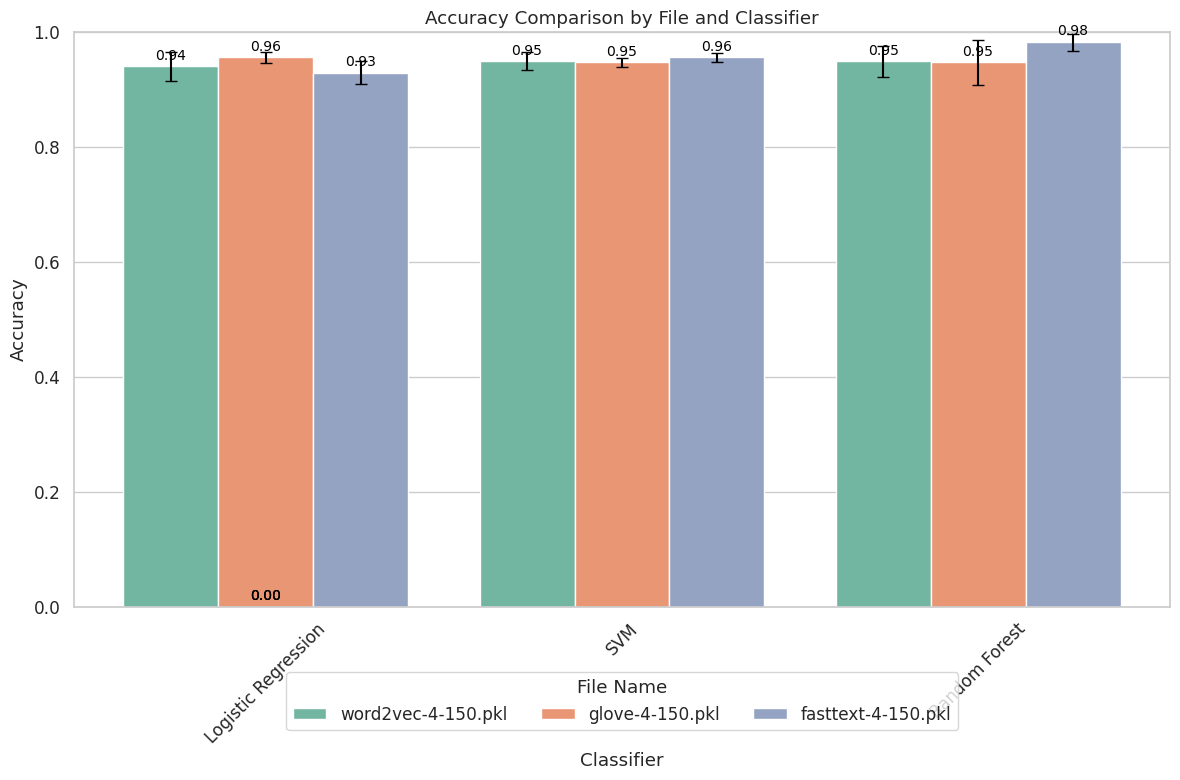

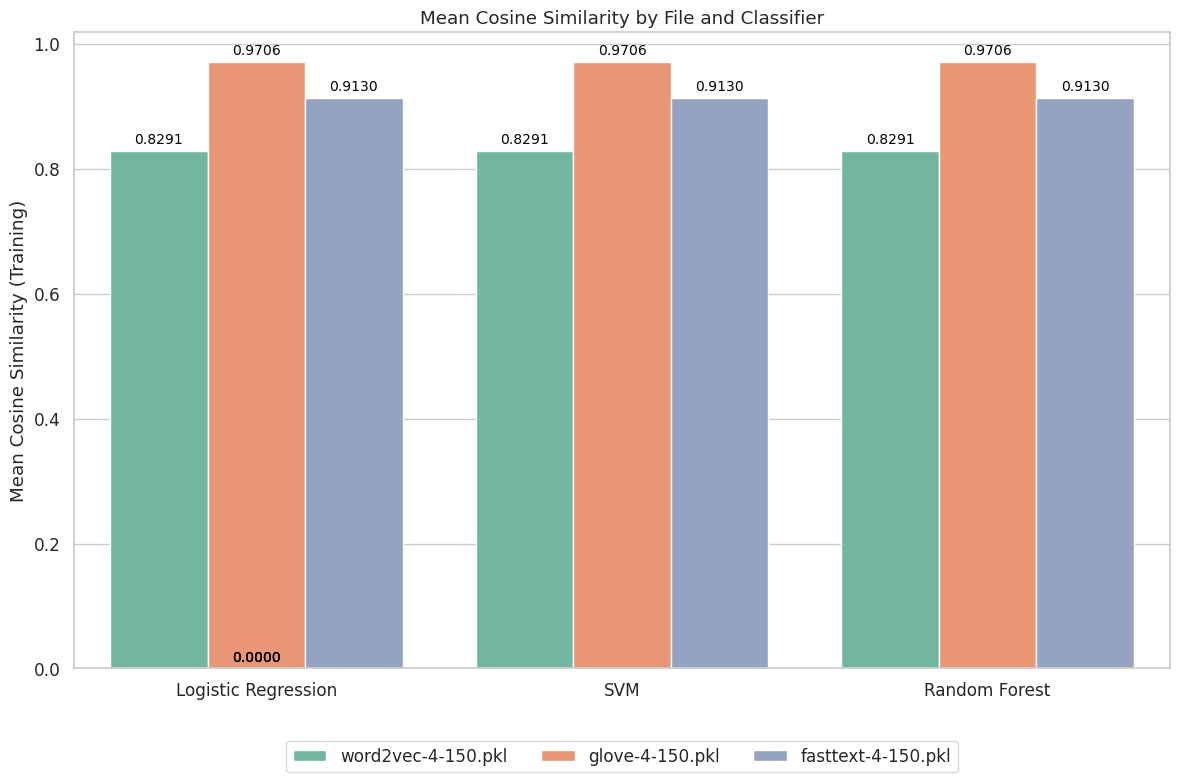


Model: word2vec-4-150.pkl - Logistic Regression
  Training set distribution: {0: 118, 1: 116, 2: 108, 3: 123}
  Test set distribution: {0: 33, 1: 29, 2: 28, 3: 27}

Model: word2vec-4-150.pkl - SVM
  Training set distribution: {0: 118, 1: 116, 2: 108, 3: 123}
  Test set distribution: {0: 33, 1: 29, 2: 28, 3: 27}

Model: word2vec-4-150.pkl - Random Forest
  Training set distribution: {0: 118, 1: 116, 2: 108, 3: 123}
  Test set distribution: {0: 33, 1: 29, 2: 28, 3: 27}

Model: glove-4-150.pkl - Logistic Regression
  Training set distribution: {0: 113, 1: 120, 2: 95, 3: 124}
  Test set distribution: {0: 36, 1: 25, 2: 26, 3: 26}

Model: glove-4-150.pkl - SVM
  Training set distribution: {0: 113, 1: 120, 2: 95, 3: 124}
  Test set distribution: {0: 36, 1: 25, 2: 26, 3: 26}

Model: glove-4-150.pkl - Random Forest
  Training set distribution: {0: 113, 1: 120, 2: 95, 3: 124}
  Test set distribution: {0: 36, 1: 25, 2: 26, 3: 26}

Model: fasttext-4-150.pkl - Logistic Regression
  Training set di

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.metrics import ConfusionMatrixDisplay

# ==============================================================================
# Function: Plot Accuracy Comparison with Error Bars
# ==============================================================================
def plot_accuracy_comparison(df):
    """
    Plot a grouped bar chart comparing the accuracy of each classifier across
    different file_name values, with error bars indicating cross_val_std.
    """
    sns.set(style="whitegrid", font_scale=1.1)
    plt.figure(figsize=(12, 8))
    
    # Grouped bar plot: x-axis is classifier, with file_name indicated by color.
    ax = sns.barplot(data=df, x='classifier', y='accuracy', hue='file_name', palette='Set2', dodge=True)
    
    # Annotate each bar with its accuracy value.
    for patch in ax.patches:
        height = patch.get_height()
        ax.annotate(f'{height:.2f}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=10,
                    color='black',
                    xytext=(0, 3),
                    textcoords='offset points')
    
    # Add error bars based on cross_val_std. We assume here that the ordering in ax.patches
    # corresponds to the ordering of rows in df (dodge=True ensures grouped order).
    patches = ax.patches
    # In case the bars are not in the same order, we may need to sort the DataFrame.
    # Here we assume df is already in the desired order.
    for i, row in df.iterrows():
        patch = patches[i]
        x_center = patch.get_x() + patch.get_width() / 2
        y_val = patch.get_height()
        std_value = row['cross_val_std']
        ax.errorbar(x_center, y_val, yerr=std_value, fmt='none', color='black', capsize=4)
    
    plt.title("Accuracy Comparison by File and Classifier")
    plt.xlabel("Classifier")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)  # Accuracy assumed to be between 0 and 1
    n_files = df['file_name'].nunique()
    plt.legend(title="File Name", loc="upper center", bbox_to_anchor=(0.5, -0.10), ncol=n_files)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# ==============================================================================
# Function: Plot Mean Cosine Similarity Comparison
# ==============================================================================
def plot_mean_cosine_similarity(df):
    """
    Plot a grouped bar chart showing the mean cosine similarity (training set)
    for each file_name and classifier combination.
    """
    sns.set(style="whitegrid", font_scale=1.1)
    plt.figure(figsize=(12, 8))
    
    ax = sns.barplot(data=df, x='classifier', y='mean_cosine_similarity_train', hue='file_name', palette='Set2', dodge=True)
    
    for patch in ax.patches:
        height = patch.get_height()
        ax.annotate(f'{height:.4f}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=10,
                    color='black',
                    xytext=(0, 3),
                    textcoords='offset points')
    
    plt.title("Mean Cosine Similarity by File and Classifier")
    plt.xlabel(" ")
    plt.ylabel("Mean Cosine Similarity (Training)")
    n_files = df['file_name'].nunique()
    plt.legend(title="", loc="upper center", bbox_to_anchor=(0.5, -0.10), ncol=n_files)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


# ==============================================================================
# Function: Compare Class Distributions (Train vs. Test)
# ==============================================================================
def compare_class_distributions(df):
    """
    Print the training and test set class distribution for each model combination.
    This function converts string representations of dictionaries (if needed) into actual dictionaries.
    """
    def safe_convert(x):
        if isinstance(x, str):
            try:
                return ast.literal_eval(x)
            except Exception as e:
                print(f"Conversion error: {e} for {x}")
                return x
        return x

    df['train_class_distribution'] = df['train_class_distribution'].apply(safe_convert)
    df['test_class_distribution'] = df['test_class_distribution'].apply(safe_convert)
    
    models = df[['file_name', 'classifier', 'train_class_distribution', 'test_class_distribution']]
    for idx, row in models.iterrows():
        print(f"\nModel: {row['file_name']} - {row['classifier']}")
        print("  Training set distribution:", row['train_class_distribution'])
        print("  Test set distribution:", row['test_class_distribution'])


# ==============================================================================
# Function: Display Confusion Matrix and Print Classification Report
# ==============================================================================
def print_confusion_reports(df):
    """
    For each model combination, print the classification report and display the confusion matrix.
    """
    models = df[['file_name', 'classifier', 'confusion_matrix', 'classification_report']]
    for idx, row in models.iterrows():
        print(f"\nModel: {row['file_name']} - {row['classifier']}")
        print("Classification Report:")
        print(row['classification_report'])
        
        # Convert the confusion matrix from string to a numpy array if necessary.
        cm = row['confusion_matrix']
        if isinstance(cm, str):
            try:
                cm = ast.literal_eval(cm)
            except Exception as e:
                print("Error converting confusion matrix:", e)
                continue
        cm = np.array(cm)
        
        plt.figure(figsize=(6, 5))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues', colorbar=True)
        plt.title(f"Confusion Matrix for {row['file_name']} - {row['classifier']}")
        plt.tight_layout()
        plt.show()


# ==============================================================================
# Function: Summarize Key Metrics
# ==============================================================================
def summarize_metrics(df):
    """
    Print a summary table with key metrics for each model combination.
    """
    summary = df[['file_name', 'classifier', 'accuracy', 'cross_val_accuracy', 'cross_val_std']]
    print("\nSummary Metrics:")
    print(summary.to_string(index=False))


# ==============================================================================
# Main: Example Usage
# ==============================================================================
if __name__ == '__main__':
    # Example DataFrame creation. Replace this with code to load your data.

    
    # Create a sample DataFrame.
    df_sample = pd.read_csv("../02-data/04-Classifier/classifiers-4-150.csv")
    
    # Run the functions to visualize and print insights.
    plot_accuracy_comparison(df_sample)
    plot_mean_cosine_similarity(df_sample)
    compare_class_distributions(df_sample)
    print_confusion_reports(df_sample)
    summarize_metrics(df_sample)


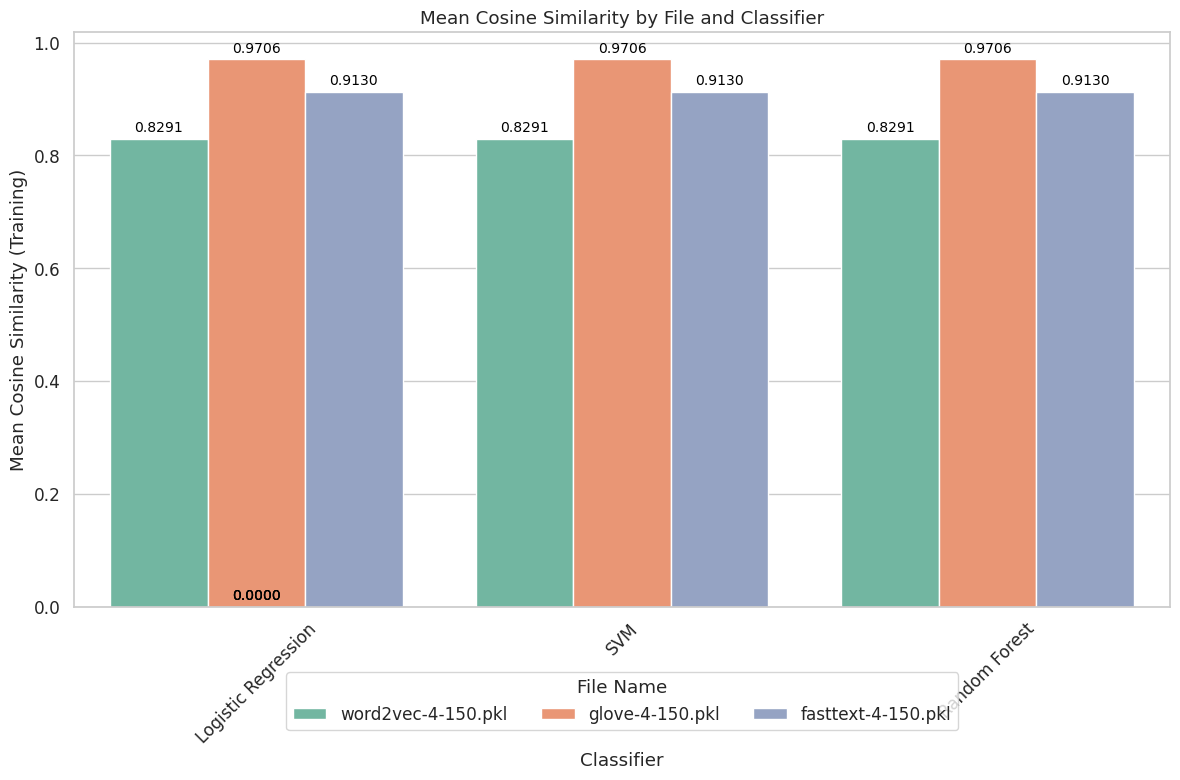

In [28]:
plot_mean_cosine_similarity(df_sample)
